In [1]:
import numpy as np
import helper_functions as hp

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K

## Load in planetscope dataset and create a simple CNN with it.

In [2]:
# Load in naip data
#naip_images_tif, naip_labels_tif = hp.dataset_reader('naip_2018_chips_90m_3class_classified_tiles')

In [2]:
# Load in planetscope data
#K.clear_session()
planetscope_images_tif, planetscope_labels_tif = hp.dataset_reader('planetscope_chips_90m_3class_classified_tiles')

reading in 30466 images


In [3]:
#np.unique(naip_labels_tif, axis = 0, return_counts=True)
np.unique(planetscope_labels_tif, axis=0, return_counts=True)

# Naip needs some data processing for the labels

(array([1, 2, 3], dtype=uint16), array([ 6236,   308, 23922], dtype=int64))

In [4]:
# Encode planetscope data
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(planetscope_labels_tif.reshape(-1, 1))
planetscope_new_labels = enc.transform(planetscope_labels_tif.reshape(-1, 1)).toarray().astype('uint8')

print(planetscope_new_labels)
print(planetscope_new_labels.shape)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
(30466, 3)


In [6]:
# Shuffle labels and images and create a train test split for NAIP data
#images_shuffle, labels_shuffle = shuffle(planetscope_images_tif, planetscope_new_labels, random_state=42)
train_images, test_images, train_labels, test_labels = train_test_split(planetscope_images_tif, planetscope_new_labels, test_size=.2, shuffle=True)

print(train_images[0])
print(test_images[0])
print(train_labels[0])
print(test_labels[0])

[[[ 495.  691.  787. 2066.]
  [ 509.  714.  839. 2130.]
  [ 538.  742.  899. 2169.]
  ...
  [ 432.  555.  567. 1938.]
  [ 425.  556.  556. 1990.]
  [ 412.  546.  534. 2036.]]

 [[ 510.  710.  815. 2102.]
  [ 509.  711.  845. 2151.]
  [ 521.  720.  881. 2187.]
  ...
  [ 432.  548.  545. 1935.]
  [ 428.  551.  545. 2011.]
  [ 415.  539.  529. 2086.]]

 [[ 515.  723.  840. 2146.]
  [ 513.  716.  870. 2178.]
  [ 518.  711.  875. 2205.]
  ...
  [ 428.  543.  534. 1941.]
  [ 424.  539.  531. 2005.]
  [ 413.  530.  511. 2055.]]

 ...

 [[ 471.  610.  670. 2010.]
  [ 454.  579.  603. 1969.]
  [ 446.  562.  580. 1906.]
  ...
  [ 471.  634.  693. 2143.]
  [ 466.  629.  689. 2069.]
  [ 468.  626.  683. 2000.]]

 [[ 488.  627.  700. 2035.]
  [ 470.  603.  644. 1992.]
  [ 457.  587.  604. 1934.]
  ...
  [ 482.  648.  730. 2108.]
  [ 472.  642.  713. 2070.]
  [ 457.  627.  682. 2042.]]

 [[ 479.  632.  693. 2069.]
  [ 464.  618.  662. 2022.]
  [ 472.  621.  660. 1964.]
  ...
  [ 492.  656.  767. 208

In [7]:
# Create a simple model for the NAIP data 
model = hp.get_simple_model(train_images[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 50)        5050      
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 50)       200       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 30)        37530     
                                                                 
 batch_normalization_1 (Batc  (None, 15, 15, 30)       120       
 hNormalization)                                                 
                                                        

In [8]:
# Calculate initial test accuracy for planetscope data.
test_init = hp.get_test_accuracy(model, test_images, test_labels)
train_init = hp.get_train_accuracy(model, train_images, train_labels)

accuracy: 0.780
accuracy: 0.771


In [9]:
# Train model with planetscope data
history = model.fit(train_images, train_labels, epochs=30, validation_data=(test_images, test_labels))

Epoch 1/30
762/762 [==============================] - 25s 31ms/step - loss: 0.1128 - accuracy: 0.9707 - val_loss: 0.0900 - val_accuracy: 0.9862
Epoch 2/30
762/762 [==============================] - 24s 31ms/step - loss: 0.0662 - accuracy: 0.9803 - val_loss: 0.0562 - val_accuracy: 0.9867
Epoch 3/30
762/762 [==============================] - 24s 32ms/step - loss: 0.0625 - accuracy: 0.9812 - val_loss: 0.4704 - val_accuracy: 0.8756
Epoch 4/30
762/762 [==============================] - 24s 32ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0623 - val_accuracy: 0.9862
Epoch 5/30
762/762 [==============================] - 25s 33ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0830 - val_accuracy: 0.9795
Epoch 6/30
762/762 [==============================] - 23s 31ms/step - loss: 0.0524 - accuracy: 0.9839 - val_loss: 0.0604 - val_accuracy: 0.9816
Epoch 7/30
762/762 [==============================] - 24s 31ms/step - loss: 0.0501 - accuracy: 0.9838 - val_loss: 0.4388 - val_accuracy:

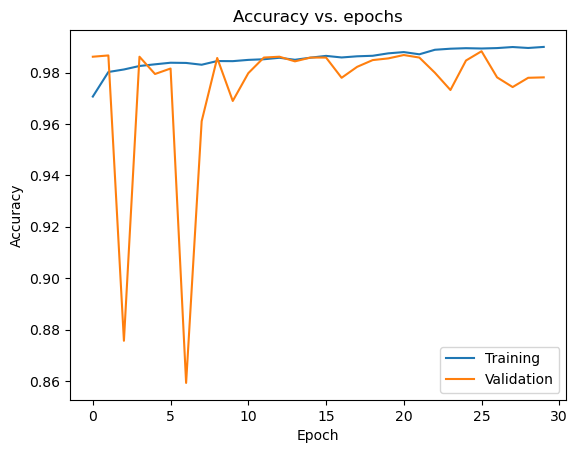

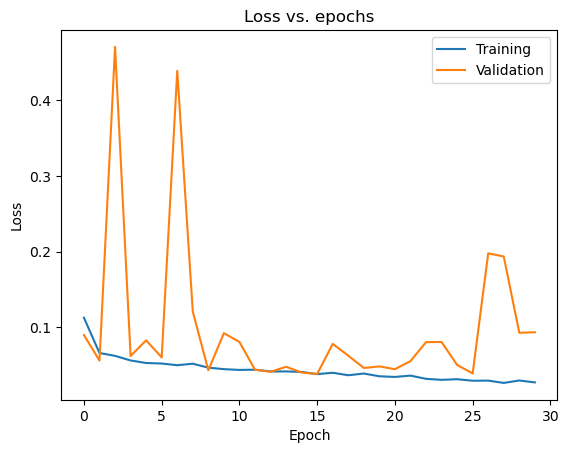

In [11]:
hp.plot_accuracy(history)
hp.plot_loss(history)